# Построение векторных полей

# Импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import k3d
from k3d.colormaps import matplotlib_color_maps

from dataset_creator.model.dataset.dataset import Dataset
from dataset_creator.model.dataset.vector_fields import get_tangents_on_interval, get_tangents_on_idxs
from dataset_creator.utils.metrics import get_linear_deviation

# Загрузка сигналов

In [2]:
u = np.load(r"tests/data/signals/log2.npy")
x11 = np.load(r"tests/data/signals/log2_scheme1_x1.npy")
x21 = np.load(r"tests/data/signals/log2_scheme2_x1.npy")
x22 = np.load(r"tests/data/signals/log2_scheme2_x2.npy")

# Построение векторных полей для двух сигналов

Формирование датасета и вычисление цветов для визуализации

In [3]:
points2d = np.vstack((u, x11)).T
dataset2d = Dataset(points2d)
colors2d = get_linear_deviation(dataset2d.values)

Касательные для интервала

In [4]:
i1, i2 = 500, 550
tangents_in_interval_2d = get_tangents_on_interval(dataset2d.values, i1, i2, length=0.1)

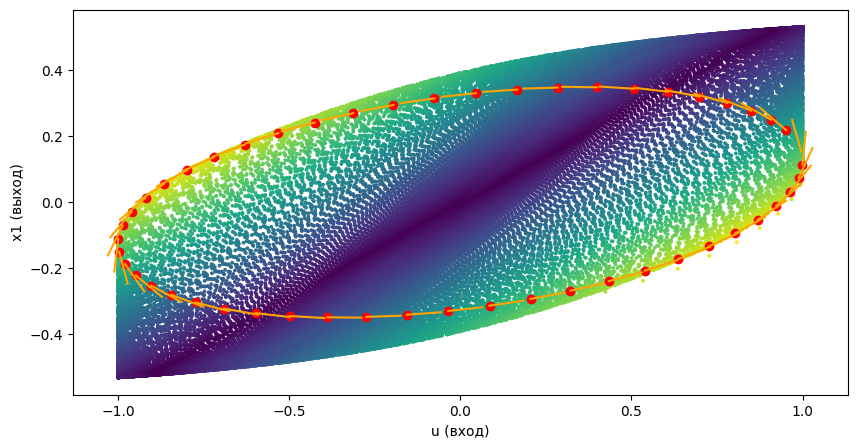

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(dataset2d.values[:, 0], dataset2d.values[:, 1], c=colors2d, s=3)
plt.scatter(dataset2d.values[i1:i2, 0], dataset2d.values[i1:i2, 1], c="red")
for t in tangents_in_interval_2d:
    plt.plot(t[:, 0], t[:, 1], color="orange")
plt.xlabel("u (вход)")
plt.ylabel("x1 (выход)")
plt.show()

Касательные для окрестности

In [6]:
neighbours_idxs_2d = dataset2d.get_idxs_in_radius(idx=505, r=0.05)
tangents_in_neighbours_2d = get_tangents_on_idxs(dataset2d.values, neighbours_idxs_2d, length=0.05)

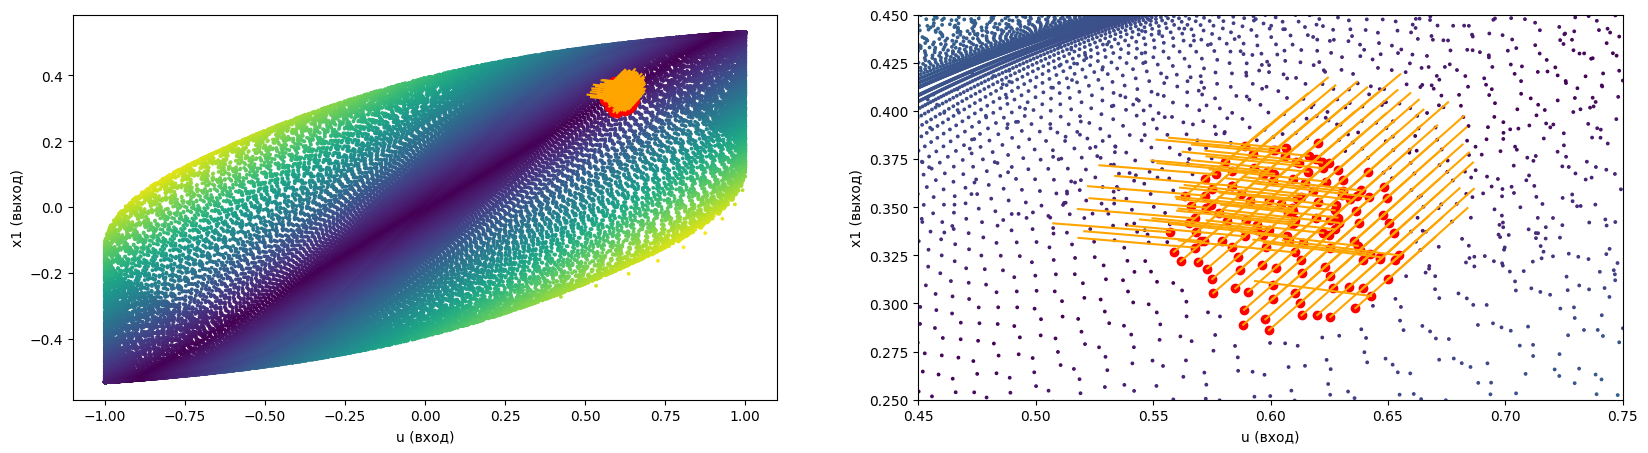

In [7]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(dataset2d.values[:, 0], dataset2d.values[:, 1], c=colors2d, s=3)
plt.scatter(dataset2d.values[neighbours_idxs_2d, 0], dataset2d.values[neighbours_idxs_2d, 1], c="red")
for t in tangents_in_neighbours_2d:
    plt.plot(t[:, 0], t[:, 1], color="orange")
plt.xlabel("u (вход)")
plt.ylabel("x1 (выход)")

plt.subplot(1, 2, 2)
plt.scatter(dataset2d.values[:, 0], dataset2d.values[:, 1], c=colors2d, s=3)
plt.scatter(dataset2d.values[neighbours_idxs_2d, 0], dataset2d.values[neighbours_idxs_2d, 1], c="red")
for t in tangents_in_neighbours_2d:
    plt.plot(t[:, 0], t[:, 1], color="orange")
plt.xlim(0.45, 0.75)
plt.ylim(0.25, 0.45)
plt.xlabel("u (вход)")
plt.ylabel("x1 (выход)")
plt.show()

# Построение векторных полей для трех сигналов

Формирование датасета и вычисление цветов для визуализации

In [8]:
points3d = np.vstack((u, x21, x22)).T
dataset3d = Dataset(points3d)
colors3d = get_linear_deviation(dataset3d.values)

Касательные для интервала

In [9]:
i1, i2 = 500, 550
tangents_in_interval_3d = get_tangents_on_interval(dataset3d.values, i1, i2, length=0.1)

In [10]:
plot = k3d.plot(axes=("u", "x1", "x2"), menu_visibility=False)
plot += k3d.points(
    positions=dataset3d.values,
    point_size=0.005,
    shader='3d',
    attribute=colors3d,
    color_map=matplotlib_color_maps.viridis,
)
plot += k3d.points(
    positions=dataset3d.values[i1:i2 + 1],
    point_size=0.01,
    shader='3d',
    color=0xff0000,
)
for t in tangents_in_interval_3d:
    plot += k3d.line(t, width=0.01, color=0xffa500)
plot.display()

Output()

In [11]:
neighbours_idxs_3d = dataset3d.get_idxs_in_radius(idx=36675, r=0.05)
tangents_in_neighbours_3d = get_tangents_on_idxs(dataset3d.values, neighbours_idxs_3d, length=0.05)

Касательные для окрестности

In [12]:
plot = k3d.plot(axes=("u", "x1", "x2"), menu_visibility=False)
plot += k3d.points(
    positions=dataset3d.values,
    point_size=0.005,
    shader='3d',
    attribute=colors3d,
    color_map=matplotlib_color_maps.viridis,
)
plot += k3d.points(
    positions=dataset3d.values[neighbours_idxs_3d],
    point_size=0.01,
    shader='3d',
    color=0xff0000,
)
for t in tangents_in_neighbours_3d:
    plot += k3d.line(t, width=0.005, color=0xffa500)
plot.display()

Output()